# Regresja wielokrotna

- regresja wielokrotna
- jakość dopasowania

In [ ]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats
from patsy import dmatrices
from statsmodels.stats.stattools import durbin_watson

import matplotlib.pyplot as plt

In [ ]:
carseats = sm.datasets.get_rdataset(dataname="Carseats", package="ISLR", cache=True)

In [ ]:
carseats_df = carseats.data

## Zadanie 1

1. Wyznacz liniową funkcję regresji opisującą zależność sprzedaży (`Sales`) od wysokości budżetu na reklamę (`Advertising`) i ceny (`Price`).


2. Zweryfikuj dopasowanie modelu `Sales ~ Advertising + Price`:
    
    a) Czy istnieje związek między zmienną zależną a przynajmniej jedną ze zmiennych niezależnych? Jeśli tak, to z którą (z którymi)?
       
    b) Czy wyraz wolny jest istotny w modelu?
       
    c) Oblicz i zinterpretuj wartość współczynnika determinacji $R^2$.
    
       
3. Wyznacz model liniowy najlepiej opisujący zależność sprzedaży fotelików samochodowych od pozostałych dostępnych zmiennych:
    
  a) Czy istnieje związek pomiędzy zmienną zależną a którąkolwiek ze zmiennych niezależnych?
       
  b) Dla których zmiennych niezależnych $X_j$, $j=1,\ldots,10$ można odrzucić hipotezę zerową  $H_0: \beta_j = 0$?
       
  c) Biorąc pod uwagę odpowiedź na poprzednie pytanie, wyznacz mniejszy model w oparciu tylko o zmienne, które faktycznie mają istotny wpływ na wielkość sprzedaży.
       
  d) Porównaj dopasowanie obu modeli (większego i mniejszego).
       
       
4. Podaj przewidywaną wartość sprzedaży dla przypadku:  
`pd.DataFrame({
    'Sales': np.NaN,
    'CompPrice': [125.0],
    'Income': [70.0],
    'Advertising': [5.0],
    'Population': [270.0],
    'Price': [120.0],
    'ShelveLoc': ['Medium'],
    'Age': [54.0],
    'Education': [15.0],
    'Urban': ['Yes'],
    'US': ['Yes']
})`

In [ ]:
#trzy sposoby tworzenia modeli w stats.models
#metoda 1
model = smf.ols('Sales~Price+Advertising',data = carseats_df).fit()
#metoda 2
carseats_df2 = sm.add_constant(carseats.data,prepend = True,has_constant = "add")
carseats_df2

X,Y = carseats_df2[['const','Price','Advertising']],carseats_df2['Sales']
model2 = sm.OLS(endog = Y,exog = X).fit()
#metoda 3
Y,X = dmatrices('Sales~Price+Advertising',data = carseats_df,return_type='dataframe')
model3 = sm.OLS(endog = Y,exog = X).fit()


In [ ]:
#print(model.summary())

print("Wartość statystyki testowej testu F (F-statistic): {}".format(model.fvalue))
print("P-wartość testu F (Prob (F-statistic)): {}".format(model.f_pvalue))
print("\n")
# p-value testu F jest małe, co oznacza, że istnieje jakiś predyktor (nie licząc intercepta),
# który jest istotny w modelu

#zobaczmy które z predyktorów

print("Wartość statystki testu t-Studenta")
print(model.tvalues)
print("\n")

print("P-wartości testu t-Studenta")
print(model.pvalues)
print("\n")
# wszystko jest małe jeśli chodzi o p-wartości co oznacza, że i Price i Advertising
# są istotne w modelu, a dodatkowo intercept też jest istotny

print("Współczynnik determinacji R2 (R-squared): {}".format(model.rsquared))
#relatywnie małe





Wartość statystyki testowej testu F (F-statistic): 77.90680749447354
P-wartość testu F (Prob (F-statistic)): 2.8710290140996263e-29


Wartość statystki testu t-Studenta
Intercept      21.427734
Price         -10.754562
Advertising     6.809327
dtype: float64


P-wartości testu t-Studenta
Intercept      3.059318e-68
Price          7.596365e-24
Advertising    3.639822e-11
dtype: float64


Współczynnik determinacji R2 (R-squared): 0.2818556033430226


In [ ]:
#model ze wszsystkimi zmiennymi
columns = list(carseats_df.columns)
columns.remove('Sales')
features = "+".join(columns)
features
model = smf.ols('Sales~'+features,data = carseats_df)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Sun, 21 May 2023   Prob (F-statistic):          1.60e-166
Time:                        23:04:05   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6606      0.603      9.380      0.000       4.474       6.847
ShelveLoc[T.Good]       4.8502      0.153     31.678      0.000       4.549       5.151
ShelveLoc[T.Medium]     1.9567      0.126     15.516      0.000       1.709       2.205
Urban[T.Yes]            0.1229      0.113      1.088      0.277      -0.099       0.345
US[T.Yes]              -0.1841      0.150     -1.229      0.220      -0.479       0.111
CompPrice               0.0928      0.004     22.378      0.000       0.085       0.101
Income                  0.0158      0.002      8.565      0.000       0.012       0.019
Advertising             0.1231      0.011     11.066      0.000       0.101       0.145
Population              0.0002      0.000      0.561      0.575      -0.001       0.001
Price                  -0.0954      0.003    -35.700      0.000      -0.101      -0.090
Age                    -0.0460      0.003    -14.472      0.000      -0.052      -0.040
Education              -0.0211      0.020     -1.070      0.285      -0.060       0.018
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     4.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print("Wartość statystyki testowej testu F (F-statistic): {}".format(fitted.fvalue))
print("P-wartość testu F (Prob (F-statistic)): {}".format(fitted.f_pvalue))
print("\n")
# p-value testu F małe, co oznacza, że istnieje jakiś predyktor (nie licząc intercepta),
# który jest istotny w modelu

#zobaczmy które z predyktorów

print("Wartość statystki testu t-Studenta")
print(fitted.tvalues)
print("\n")

print("P-wartości testu t-Studenta")
print(fitted.pvalues)

# zmienne istotne (o małym p-value)'Intercept', 'ShelveLoc[T.Good]', 'ShelveLoc[T.Medium]',
#       'CompPrice', 'Income', 'Advertising', 'Price', 'Age'

Wartość statystyki testowej testu F (F-statistic): 243.37218067933574
P-wartość testu F (Prob (F-statistic)): 1.59926509010143e-166


Wartość statystki testu t-Studenta
Intercept               9.380455
ShelveLoc[T.Good]      31.677773
ShelveLoc[T.Medium]    15.516473
Urban[T.Yes]            1.087720
US[T.Yes]              -1.228577
CompPrice              22.377799
Income                  8.564677
Advertising            11.066035
Population              0.561139
Price                 -35.700171
Age                   -14.471810
Education              -1.070046
dtype: float64


P-wartości testu t-Studenta
Intercept               5.596251e-19
ShelveLoc[T.Good]      1.192737e-109
ShelveLoc[T.Medium]     1.383807e-42
Urban[T.Yes]            2.773938e-01
US[T.Yes]               2.199750e-01
CompPrice               7.935340e-72
Income                  2.579912e-16
Advertising             6.353734e-25
Population              5.750270e-01
Price                  1.175168e-124
Age                 

In [ ]:
np.array(model.exog_names)[fitted.pvalues<0.05]

array(['Intercept', 'ShelveLoc[T.Good]', 'ShelveLoc[T.Medium]',
       'CompPrice', 'Income', 'Advertising', 'Price', 'Age'], dtype='<U19')

In [ ]:
#model ze zmiennymi istotnymi (w praktyce tak się robi, w teorii jest to nie do końca dobre
#zmienna nieistotna, która jest współliniowa z jakąś inną, po wyrzuceniu jakiejś innej,
#nagle stanie się istotna (p-val. zmaleje))
model_red = smf.ols('Sales~ShelveLoc+CompPrice+Income+Advertising+Price+Age',data = carseats_df)
fitted_red = model_red.fit()
fitted_red.summary()
fitted_red

In [ ]:
print("Współczynnik determinacji R2 (R-squared): {}".format(fitted.rsquared))
print("Współczynnik determinacji R2 (R-squared): {}".format(fitted_red.rsquared))
#Modele mają porównywalne R^2, ale drugi robi to na mniejszej liczbie zmiennych, więc jest lepszy

Współczynnik determinacji R2 (R-squared): 0.8734133434127013
Współczynnik determinacji R2 (R-squared): 0.871982496884308


In [ ]:
#predykcja
new_obs = pd.DataFrame({ 'Sales': np.NaN, 'CompPrice': [125.0], 'Income': [70.0],
              'Advertising': [5.0], 'Population': [270.0], 'Price': [120.0], 'ShelveLoc': ['Medium'], 'Age': [54.0],
              'Education': [15.0], 'Urban': ['Yes'], 'US': ['Yes'] })

fitted_red.predict(new_obs)

0    6.753957
dtype: float64

# Zadanie 2

1. Wczytać dane `realest.csv`, które zawierają informacje na temat domów na przedmieściach Chicago: cena domu (`Price`), liczba sypialni (`Bedroom`), powierzchnia w stopach kwadratowych (`Space`), liczba pokoi (`Room`), szerokość frontu działki w stopach (`Lot`), roczny podatek od nieruchomości (`Tax`), liczba łazienek (`Bathroom`), liczba miejsc parkingowych w garażu (`Garage`) i stan domu (`Condition`, 0-dobry, 1-wymaga remontu).
       
2. Wyznacz model liniowy najlepiej opisujący zależność ceny domu od pozostałych zmiennych w zbiorze:
    
  a) Czy istnieje związek pomiędzy zmienną zależną a którąkolwiek ze zmiennych niezależnych?
       
  b) Dla których zmiennych niezależnych $X_j$, $j=1,\ldots,10$ można odrzucić hipotezę zerową  $H_0: \beta_j = 0$?
       
  c) Biorąc pod uwagę odpowiedź na poprzednie pytanie, wyznacz mniejszy model w oparciu tylko o zmienne, które faktycznie mają istotny wpływ na wielkość sprzedaży.
       
  d) Porównaj dopasowanie obu modeli (większego i mniejszego).

3. Podaj przewidywaną wartość sprzedaży dla przypadku:  
`pd.DataFrame({
    'Price': np.NaN,
    'Bedroom': [3.0],
    'Space': [1100],
    'Room': [6.0],
    'Lot': [32.0],
    'Tax': [911.0],
    'Bathroom': [1.5],
    'Garage': [1.0],
    'Condition': [0.0]
})`

In [ ]:
#1
realest = pd.read_csv('realest.csv')
print(realest)
#są Na wyrzućmy je
realest = realest.dropna(axis =0)
print(realest)

     Price  Bedroom   Space  Room   Lot     Tax  Bathroom  Garage  Condition
0     53.0      2.0   967.0   5.0  39.0   652.0       1.5     0.0        0.0
1     55.0      2.0   815.0   5.0  33.0  1000.0       1.0     2.0        1.0
2     56.0      3.0   900.0   5.0  35.0   897.0       1.5     1.0        0.0
3     58.0      3.0  1007.0   6.0  24.0   964.0       1.5     2.0        0.0
4     64.0      3.0  1100.0   7.0  50.0  1099.0       1.5     1.5        0.0
..     ...      ...     ...   ...   ...     ...       ...     ...        ...
152   44.0      3.0   820.0   5.0  27.0     NaN       1.0     0.0        1.0
153   43.0      2.0   593.0   4.0  30.0   465.0       2.0     1.0        0.0
154   53.0      3.0   716.0   6.0  30.0   585.0       1.0     2.0        1.0
155   62.0      4.0   951.0   7.0  30.0   895.0       2.0     1.0        0.0
156    NaN      NaN     NaN   NaN   NaN     NaN       NaN     NaN        NaN

[157 rows x 9 columns]
     Price  Bedroom   Space  Room   Lot     Tax  Bat

In [ ]:
realest.shape

(128, 9)

In [ ]:
#2
#model ze wszsystkimi zmiennymi
columns = list(realest.columns)
columns.remove('Price')
features = "+".join(columns)
features
model = smf.ols('Price~'+features,data = realest)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     37.90
Date:                Sun, 21 May 2023   Prob (F-statistic):           2.76e-29
Time:                        23:04:49   Log-Likelihood:                -431.77
No. Observations:                 128   AIC:                             881.5
Df Residuals:                     119   BIC:                             907.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.9935      4.081      4.899      0.000      11.912      28.075
Bedroom       -3.1602      0.931     -3.394      0.001      -5.004      -1.317
Space          0.0097      0.004      2.611      0.010       0.002       0.017
Room           1.6890      1.120      1.508      0.134      -0.529       3.907
Lot            0.2362      0.090      2.634      0.010       0.059       0.414
Tax            0.0044      0.003      1.490      0.139      -0.001       0.010
Bathroom       6.3758      2.018      3.160      0.002       2.380      10.371
Garage         4.1448      0.956      4.337      0.000       2.253       6.037
Condition      1.8358      1.797      1.021      0.309      -1.723       5.394
==============================================================================
Omnibus:                        0.338   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.361
Skew:                           0.120   Prob(JB):                        0.835
Kurtosis:                       2.899   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print("Wartość statystyki testowej testu F (F-statistic): {}".format(fitted.fvalue))
print("P-wartość testu F (Prob (F-statistic)): {}".format(fitted.f_pvalue))
print("\n")
# p-value testu F małe, co oznacza, że istnieje jakiś predyktor (nie licząc intercepta),
# który jest istotny w modelu

#zobaczmy które z predyktorów

print("Wartość statystki testu t-Studenta")
print(fitted.tvalues)
print("\n")

print("P-wartości testu t-Studenta")
print(fitted.pvalues)

# zmienne istotne (o małym p-value)'Intercept', 'Bedroom ', 'Space',
#       'Lot', 'Bathroom', 'Garage'

Wartość statystyki testowej testu F (F-statistic): 37.90423305879616
P-wartość testu F (Prob (F-statistic)): 2.7551590213656354e-29


Wartość statystki testu t-Studenta
Intercept    4.898879
Bedroom     -3.394327
Space        2.610959
Room         1.507697
Lot          2.634458
Tax          1.490418
Bathroom     3.159694
Garage       4.337439
Condition    1.021470
dtype: float64


P-wartości testu t-Studenta
Intercept    0.000003
Bedroom      0.000935
Space        0.010190
Room         0.134282
Lot          0.009548
Tax          0.138760
Bathroom     0.002003
Garage       0.000030
Condition    0.309104
dtype: float64


In [ ]:
np.array(model.exog_names)[fitted.pvalues<0.05]

array(['Intercept', 'Bedroom', 'Space', 'Lot', 'Bathroom', 'Garage'],
      dtype='<U9')

In [ ]:
model_red = smf.ols('Price~Bedroom+Space+Lot+Bathroom+Garage',data = realest)
fitted_red = model_red.fit()
fitted_red.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     59.40
Date:                Sun, 21 May 2023   Prob (F-statistic):           4.59e-31
Time:                        23:04:58   Log-Likelihood:                -433.86
No. Observations:                 128   AIC:                             879.7
Df Residuals:                     122   BIC:                             896.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.9651      2.689      9.655      0.000      20.642      31.289
Bedroom       -2.6740      0.638     -4.193      0.000      -3.936      -1.411
Space          0.0154      0.002      7.954      0.000       0.012       0.019
Lot            0.2792      0.086      3.251      0.001       0.109       0.449
Bathroom       6.2081      1.669      3.720      0.000       2.904       9.512
Garage         4.6954      0.885      5.308      0.000       2.944       6.447
==============================================================================
Omnibus:                        0.463   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.793   Jarque-Bera (JB):                0.606
Skew:                           0.116   Prob(JB):                        0.739
Kurtosis:                       2.756   Cond. No.                     5.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print("Współczynnik determinacji R2 (R-squared): {}".format(fitted.rsquared))
print("Współczynnik determinacji R2 (R-squared): {}".format(fitted_red.rsquared))
#Modele mają porównywalne R^2, ale drugi robi to na mniejszej liczbie zmiennych, więc jest lepszy

Współczynnik determinacji R2 (R-squared): 0.7181656659650734
Współczynnik determinacji R2 (R-squared): 0.708820511203659


In [ ]:
#3
newdata = pd.DataFrame({
    'Price': np.NaN,
    'Bedroom': [3.0],
    'Space': [1100.0],
    'Room': [6.0],
    'Lot': [32.0],
    'Tax': [911.0],
    'Bathroom': [1.5],
    'Garage': [1.0],
    'Condition': [0.0]
})

print(fitted.predict(newdata))
#ewentualnie dla modelu zredukowanego
newdata2 = pd.DataFrame({
    'Price': np.NaN,
    'Bedroom': [3.0],
    'Space': [1100.0],
    'Lot': [32.0],
    'Bathroom': [1.5],
    'Garage': [1.0]
})
print(fitted_red.predict(newdata2))

0    56.563255
dtype: float64
0    57.863901
dtype: float64


# Obserwacje odstające

### Diagnostyka

Obserwacja odstająca (ang.outlier) jest obserwacją, która nie spełnia równania regresji czyli nie należy do modelu regresji. Obserwacje odstające mogą znacząco wpływać na postać prostej regresji.

**Rezyduum** $e_i$ przyjmuje dla $i$-tej obserwacji wartość różnicy:
$$
e_i = y_i - \hat{y}_i.
$$

**Błąd standardowy** takiego rezyduum $e_i$ jest równy:
$$
\text{SE}(e_i) = S\cdot\sqrt{1-h_i},
$$
gdzie
- $S = \sigma$ oznacza przęciętne odchylenie wartości rzeczywistych od wartości przewidywanych,
- $h_i$ - wartość wpływu $i$-tej obserwacji, która wyraża się wzorem
$$
h_i = \frac{1}{n} + \frac{(x_i - \overline{x})^2}{\sum_{i=1}^n(x_i - \overline{x})^2}
$$

Obserwacje odstajacę dzielimy na
    - wpływowe - obserwacja jest wpływowa jesli jej usuniecie z modelu ma duży wpływ na dopasowanie modelu/prognoże na podstawie modelu;
    - niewpływowe - obserwacja jest niewpływowa jesli jej usuniecie z modelu nie ma wpływu na dopasowanie modelu/prognoże na podstawie modelu;
  

  
### Detekcja obserwacji odstających:

1. **Wykres studentyzowanych rezyduów**

Dla małych prób, wartości zmiennej objaśniającej nie są w miarę równomiernie rozłożone i niektóre błędy $\text{SE}(e_i)$ mogą znacznie odbierać od błędu $S$. Wówczas dobrze jest analizować rezydua przy użyciu tzw. **rezyduów studentyzowanych**.

$$r_i =\frac{e_i}{\text{SE}(e_i)}$$

To pozwoli wykrywać obserwacje faktycznie odstające, pomijając te, które przy analizie rezyduów $e_i$ sugerowały, że są odstające mimo, że takimi nie były. Dla rezyduów studentyzowanych zakłada się, że przy poziomie ufności równym 0.95 uznaje się je za normalne (zachowujące własność rozkładu normalnego), gdy należą do przedziału $[−2,+2]$.

Wykres studentyzowanych rezyduów względem ich indeksu identyfikuje duże wartości, które przypuszczalnie odpowiadają obserwacjom odstającym. Metodata nie sprawdzi się w sytuacji, gdy mamy w analizowanym zbiorze obserwację wpływową o małej wartości $e_i$. Wówczas bowiem nie określimy jej jako odstającej mimo, że taka w istocie jest.

2. **Wpływowość**

Wpływ $i$-tej obserwacji $h_i$ określamy wzorem
$$
h_i = \frac{1}{n} + \frac{(x_i - \overline{x})^2}{\sum_{i=1}^n(x_i - \overline{x})^2},
$$
który określa odstępstwo $x_i$ od $\overline{x}$.

Dla modelu o $p$ parametrach (gdzie $p$ to łączna liczba zmiennych objaśniających i objaśnianych), obserwację uznajemy za wpływową jeśli
$$
h_i \geq \frac{2p}{n}.
$$

3. **Odległość Cooka**

Jest to miara stopnia zmiany współczynników regresji, gdyby dany przypadek pominąć w obliczeniach współczynników:
$$
D_i = \frac{\sum_{j=1}^n(\hat{Y}_j - \hat{Y}_{j(i)})^2}{pS^2},
$$
gdzie $\hat{Y}_j$ - prognoza na podstawie pełnych danych, $\hat{Y}_{j(i)}$ - prognoza bez $i$-tej obserwacji.

**Interpretacja**: Duża wartość $D_i$ wskazuje na znaczy wpływ usunięcia $i$-tej obserwacji, czyli $i$-ta obserwacja jest obserwacją wpływową.

Wszystkie wartości dla danej odległości powinny być tego samego rzędu. Jeśli tak nie jest, to prawdopodobnie dany przypadek ma istotnie duży wpływ na obciążenie równania regresji.

**Reguła kciuka**: $D_i > \frac{4}{(n − p − 1)}$

# Zadanie 3
Przeanalizuj obserwacje odstające w modelu `model` dla danych `Carseats`. Zidentyfikuj obserwacje im odpowiadające, usuń je ze zbioru i zbuduj model ponownie. Porównaj dopasowanie modeli.
Analogicznie postępuj dla modelu `model2`.

In [ ]:
carseats = sm.datasets.get_rdataset(dataname="Carseats", package="ISLR", cache=True)
columns = list(carseats.data.columns)
columns.remove('Sales')
features = "+".join(columns)

model = smf.ols('Sales ~ ' + features, data=carseats.data)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Sat, 06 Jul 2024   Prob (F-statistic):          1.60e-166
Time:                        01:35:45   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6606      0.603      9.380      0.000       4.474       6.847
ShelveLoc[T.Good]       4.8502      0.153     31.678      0.000       4.549       5.151
ShelveLoc[T.Medium]     1.9567      0.126     15.516      0.000       1.709       2.205
Urban[T.Yes]            0.1229      0.113      1.088      0.277      -0.099       0.345
US[T.Yes]              -0.1841      0.150     -1.229      0.220      -0.479       0.111
CompPrice               0.0928      0.004     22.378      0.000       0.085       0.101
Income                  0.0158      0.002      8.565      0.000       0.012       0.019
Advertising             0.1231      0.011     11.066      0.000       0.101       0.145
Population              0.0002      0.000      0.561      0.575      -0.001       0.001
Price                  -0.0954      0.003    -35.700      0.000      -0.101      -0.090
Age                    -0.0460      0.003    -14.472      0.000      -0.052      -0.040
Education              -0.0211      0.020     -1.070      0.285      -0.060       0.018
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     4.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
h = fitted_model.get_influence()
h.resid_studentized

array([ 2.24252234, -1.19294915,  0.7673699 , -1.10096644, -1.92751846,
        1.1385529 ,  0.42882349,  0.3002147 ,  0.44537056, -1.12713069,
        0.87498929,  0.10864812,  0.23732197, -0.94598368,  1.5812939 ,
        2.68280493, -0.90056957,  0.46918652,  0.51731325,  0.97997718,
       -0.00947193,  1.00786336, -0.7366876 ,  0.58807835,  0.13356578,
        1.49165942, -0.17647458,  0.07418664, -1.39637616,  1.8461038 ,
       -0.14267775,  0.03222147,  0.13257894,  0.31652513, -2.00089648,
        0.32832437, -1.51799084, -1.98425367,  0.51658082, -0.34468259,
       -0.45424237,  1.51543928, -0.5904213 , -1.096305  , -0.82713855,
       -0.00433115, -0.73024826, -1.50174549, -0.62928836, -0.03555808,
       -1.84576605,  0.04180425,  1.56194506,  1.13544465, -0.61468275,
        1.97628987,  1.18367665, -0.10643179,  0.47043461, -0.29643053,
        0.68545345,  1.04887437, -0.83534378, -0.07289291,  0.23833471,
        0.51605326, -0.60087042,  0.50216278,  1.29443813,  0.14

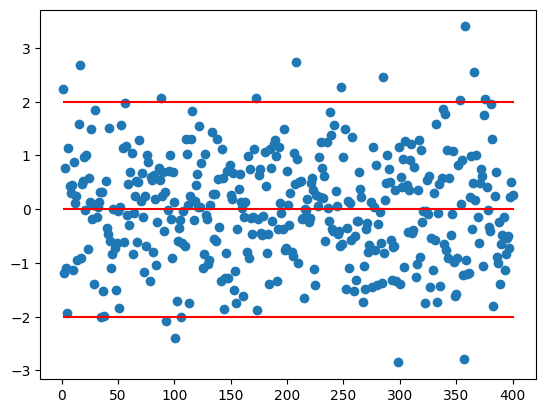

In [ ]:
#wartości odstające
x = np.arange(1, h.resid_studentized.size + 1)
plt.scatter(x=x, y=h.resid_studentized)
plt.hlines(xmin=1, xmax=h.resid_studentized.size + 1, y=-2, color="r")
plt.hlines(xmin=1, xmax=h.resid_studentized.size + 1, y=0, color="r")
plt.hlines(xmin=1, xmax=h.resid_studentized.size + 1, y=2, color="r")
#te poza pasem kwalifikujemy jako do usunięcia

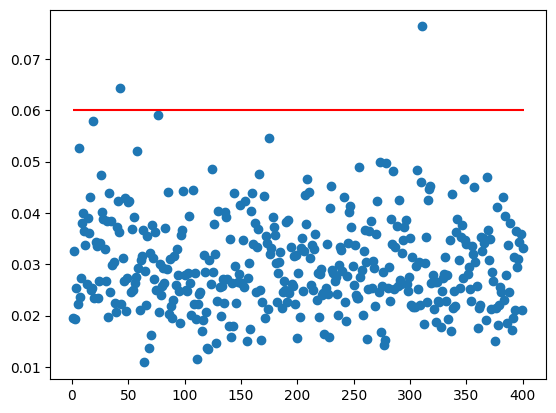

In [ ]:
#wartości wpływowe h_i
h.hat_matrix_diag
threshold = 2*h.exog.shape[1]/h.exog.shape[0]

x = np.arange(1, h.hat_matrix_diag.size + 1)
plt.scatter(x=x, y=h.hat_matrix_diag)
plt.hlines(xmin=1, xmax=h.hat_matrix_diag.size + 1, y=threshold, color="r")
#są dwie obs wpływowe

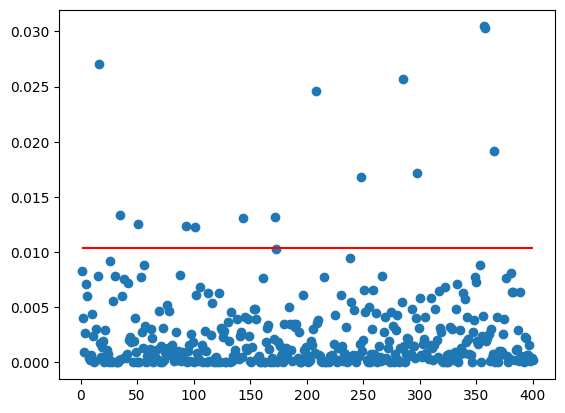

In [ ]:
#obserwacje wpływowe odległości cooka (inna metoda detekcji wpływowości)
threshold = 4/(h.exog.shape[0]-h.exog.shape[1]-1)
h.cooks_distance
x = np.arange(1, h.cooks_distance[0].size + 1)
plt.scatter(x=x, y=h.cooks_distance[0])
plt.hlines(xmin=1, xmax = x[-1], y = threshold, color='r')